In [176]:
import pandas
import numpy as np
import seaborn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Create Data Frame

In [331]:
df = pandas.read_csv("drive/MyDrive/Colab Notebooks/vgsales.csv")
#df = df.reset_index()
df=df.dropna(axis=0, how='any')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#Visualize

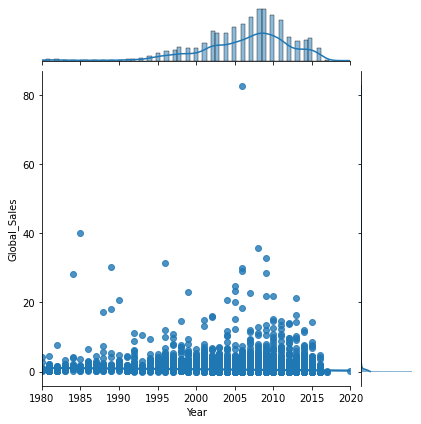

In [104]:
seaborn.jointplot(x=df["Year"], y=df["Global_Sales"], data=df, kind="reg")

#Split Data

In [370]:
x_train, x_test, y_train, y_test = train_test_split(df["Year"], df["Global_Sales"], test_size = 0.05, random_state=10)

x_train = numpy.reshape(x_train.to_numpy(), (-1,1))
x_test = numpy.reshape(x_test.to_numpy(), (-1,1))

y_train = numpy.reshape(y_train.to_numpy(), (-1,1))
y_test = numpy.reshape(y_test.to_numpy(), (-1,1))

#Linear Regression

In [378]:
#Create linear Regression model

cls = linear_model.LinearRegression()
cls.fit(x_train, y_train)

#Predict from test

prediction = cls.predict(x_test)

In [379]:
#Display all parameters

print("Co-efficient: ", end = '') 
print(cls.coef_)
print("Intercept: ", end = '')
print(cls.intercept_)
print("Mean Square Error: ", end = '')
print(metrics.mean_squared_error(y_test, prediction))
print("Model R^2: ", end = '')
print(metrics.r2_score(y_test, prediction))

Co-efficient: [[-0.01988377]]
Intercept: [40.43961105]
Mean Square Error: 0.9073829263500253
Model R^2: 0.01397369276078686


Text(0.5, 1.0, 'Linear Regression')

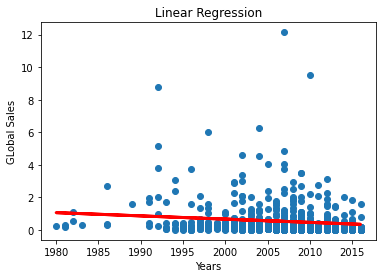

In [380]:
#Plot linear regression

plt.scatter(x_test,  y_test)
plt.plot(x_test,prediction,color='red',linewidth=3)
plt.xlabel("Years")
plt.ylabel("GLobal Sales")
plt.title("Linear Regression")